In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("spam.csv", encoding='latin1')

In [3]:
df1.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5399,ham,And he's apparently bffs with carly quick now,NaN,NaN,NaN
2469,ham,* Am on my way,NaN,NaN,NaN
989,ham,Ugh. Gotta drive back to sd from la. My butt i...,NaN,NaN,NaN
4681,ham,"Haha yeah, 2 oz is kind of a shitload",NaN,NaN,NaN
3531,ham,"Actually, my mobile is full of msg. And i m do...",NaN,NaN,NaN


In [4]:
df1.shape

(5572, 5)

# 1.Data Cleaning

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df1.sample(5)

,v1,v2
5003,ham,There's someone here that has a year &lt;#&gt...
3105,ham,I had been hoping i would not have to send you...
494,ham,Are you free now?can i call now?
2783,ham,"Just arrived, see you in a couple days &lt;3"
388,spam,4mths half price Orange line rental & latest c...


In [8]:
# renaming the cols
df1.rename(columns={'v1':'target','v2':'text'},inplace=True)
df1.sample(5)

,target,text
768,ham,I cant pick the phone right now. Pls send a me...
2417,ham,Oh... Lk tt den we take e one tt ends at cine ...
4873,ham,Wat happened to the cruise thing
3269,ham,K actually can you guys meet me at the sunoco ...
3156,ham,Havent shopping now lor i juz arrive only


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df1['target'] = encoder.fit_transform(df1['target'])

In [11]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df1.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df1.duplicated().sum()

403

In [14]:
# remove duplicates
df1= df1.drop_duplicates(keep='first')

In [15]:
df1.duplicated().sum()

0

In [16]:
df1.shape

(5169, 2)

# 2. EDA

In [17]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df1['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

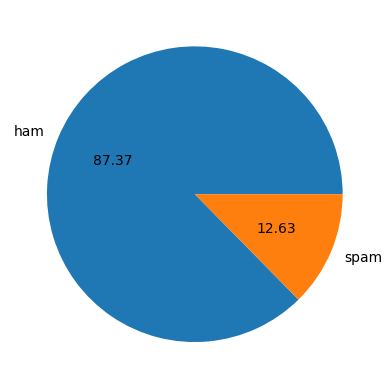

In [19]:
import matplotlib.pyplot as plt
plt.pie(df1['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

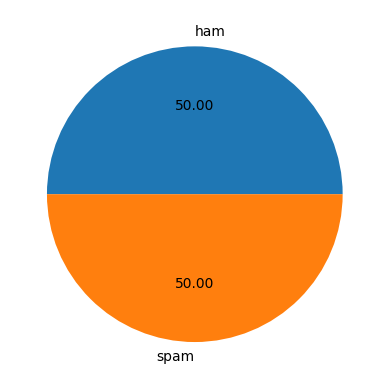

In [20]:
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Separate the majority and minority classes
majority_class = df1[df1['target'] == 0]
minority_class = df1[df1['target'] == 1]

# Down-sample the majority class to match the number of instances in the minority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Concatenate the down-sampled majority class with the minority class
df = pd.concat([majority_downsampled, minority_class])

# Plot the balanced dataset
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()


In [21]:
df['target'].value_counts()

0    653
1    653
Name: target, dtype: int64

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
1883,0,"Come to me, slave. Your doing it again ... Goi...",128
1709,0,U meet other fren dun wan meet me ah... Muz b ...,59
4919,0,"G says you never answer your texts, confirm/deny",48
1297,0,"K so am I, how much for an 8th? Fifty?",38
3948,0,HMM yeah if your not too grooved out! And im l...,83


In [26]:
df.drop(columns=['num_characters'],inplace=True)

In [27]:
df.head()

,target,text
1883,0,"Come to me, slave. Your doing it again ... Goi..."
1709,0,U meet other fren dun wan meet me ah... Muz b ...
4919,0,"G says you never answer your texts, confirm/deny"
1297,0,"K so am I, how much for an 8th? Fifty?"
3948,0,HMM yeah if your not too grooved out! And im l...


# 3. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
Removing stop words and punctuation
Stemming

In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import string

# Create a Porter Stemmer instance
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [29]:
df['text'][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [30]:
 transform_text(df['text'][11])

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [31]:
df['transformed_text'] = df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,transformed_text
1883,0,"Come to me, slave. Your doing it again ... Goi...",come slave go shell unconsci avoid make unhappi
1709,0,U meet other fren dun wan meet me ah... Muz b ...,u meet fren dun wan meet ah muz b guy rite
4919,0,"G says you never answer your texts, confirm/deny",g say never answer text
1297,0,"K so am I, how much for an 8th? Fifty?",k much 8th fifti
3948,0,HMM yeah if your not too grooved out! And im l...,hmm yeah groov im look forward pound special


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

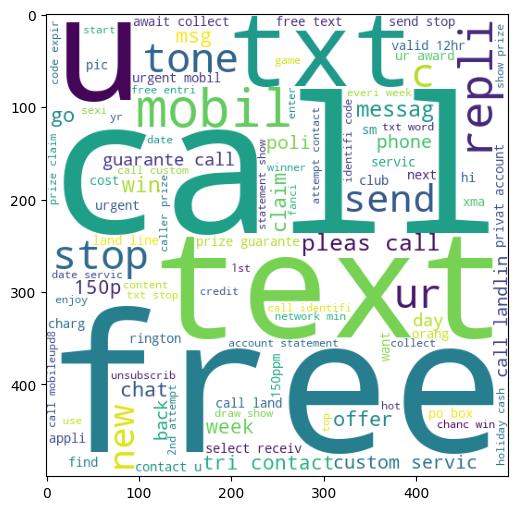

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

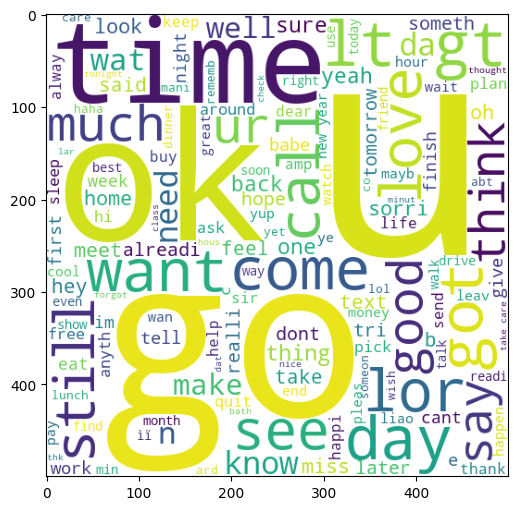

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [38]:
df.head()

,target,text,transformed_text
1883,0,"Come to me, slave. Your doing it again ... Goi...",come slave go shell unconsci avoid make unhappi
1709,0,U meet other fren dun wan meet me ah... Muz b ...,u meet fren dun wan meet ah muz b guy rite
4919,0,"G says you never answer your texts, confirm/deny",g say never answer text
1297,0,"K so am I, how much for an 8th? Fifty?",k much 8th fifti
3948,0,HMM yeah if your not too grooved out! And im l...,hmm yeah groov im look forward pound special


In [39]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [40]:
len(spam_corpus)

9939

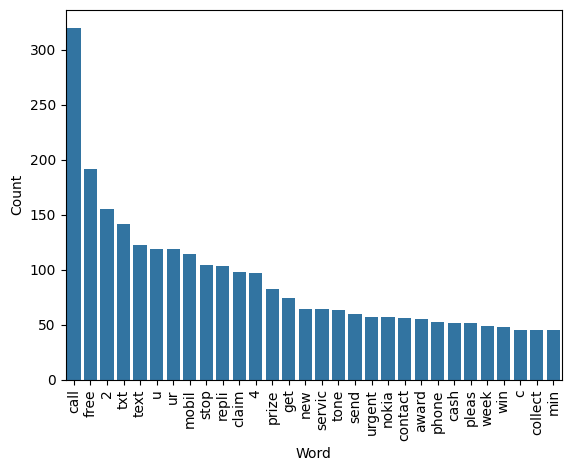

In [41]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

counter_data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using Seaborn
sns.barplot(x='Word', y='Count', data=counter_data)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [43]:
len(ham_corpus)

5096

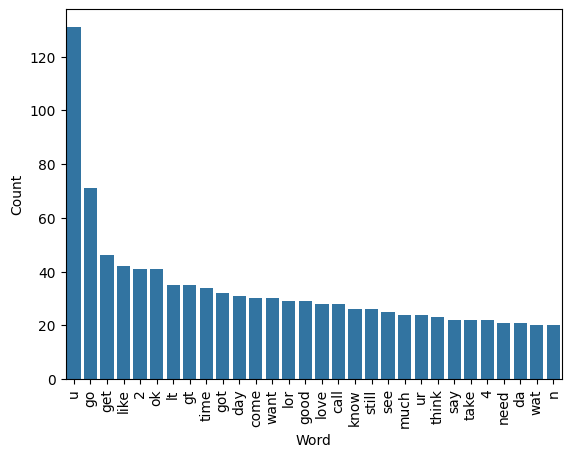

In [44]:
counter_data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using Seaborn
sns.barplot(x='Word', y='Count', data=counter_data)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,transformed_text
1883,0,"Come to me, slave. Your doing it again ... Goi...",come slave go shell unconsci avoid make unhappi
1709,0,U meet other fren dun wan meet me ah... Muz b ...,u meet fren dun wan meet ah muz b guy rite
4919,0,"G says you never answer your texts, confirm/deny",g say never answer text
1297,0,"K so am I, how much for an 8th? Fifty?",k much 8th fifti
3948,0,HMM yeah if your not too grooved out! And im l...,hmm yeah groov im look forward pound special


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['transformed_text'], df['target'], test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent length
max_sequence_length = 100  # You can adjust this based on your dataset
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

# Define the CNN model
embedding_dim = 50  # You can adjust this based on your dataset

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))





In [47]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/10
14/14 [==============================] - 4s 78ms/step - loss: 0.6919 - accuracy: 0.5174 - val_loss: 0.6857 - val_accuracy: 0.5167
Epoch 2/10
14/14 [==============================] - 1s 42ms/step - loss: 0.6770 - accuracy: 0.5437 - val_loss: 0.6564 - val_accuracy: 0.5167
Epoch 3/10
14/14 [==============================] - 1s 39ms/step - loss: 0.6110 - accuracy: 0.7473 - val_loss: 0.5216 - val_accuracy: 0.8804
Epoch 4/10
14/14 [==============================] - 1s 40ms/step - loss: 0.3769 - accuracy: 0.9210 - val_loss: 0.2446 - val_accuracy: 0.9187
Epoch 5/10
14/14 [==============================] - 1s 37ms/step - loss: 0.1587 - accuracy: 0.9473 - val_loss: 0.1668 - val_accuracy: 0.9474
Epoch 6/10
14/14 [==============================] - 0s 34ms/step - loss: 0.0931 - accuracy: 0.9689 - val_loss: 0.1757 - val_accuracy: 0.9474
Epoch 7/10
14/14 [==============================] - 1s 39ms/step - loss: 0.0602 - accuracy: 0.9844 - val_loss: 0.1678 - val_accuracy: 0.9426
Epoch 8/10
14

In [48]:
# Example of making predictions on new input
new_input = ["Congratulations! You've won a free cruise to the Bahamas. Claim your prize now by click"]
new_input_seq = tokenizer.texts_to_sequences(new_input)
new_input_pad = pad_sequences(new_input_seq, maxlen=max_sequence_length, padding='post')

# Make predictions on new input
prediction = model.predict(new_input_pad)
print(f'Prediction: {prediction[0][0]}')

1/1 [==============================] - 0s 291ms/step
Prediction: 0.9369710087776184


In [49]:

if prediction[0][0] >= 0.5:
    print("The email is classified as spam.")
else:
    print("The email is classified as not spam (ham).")


The email is classified as spam.
